## Вероятность.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as sps

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


### Задача 1.


**Части 1-3**

Условие задачи в контесте, ссылка на который отправлена через бот.
Далее можно использовать как свою реализацию функций, так и библиотечную.

**Часть 4**


Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам. Для построения графика необходимо брать достаточно большое количество точек сетки.

In [ ]:
def uniform(size=1, precision=30):
    if isinstance(size, int):
        size = (size,)
    bits = sps.bernoulli(p=0.5).rvs(size + (precision,))
    res = np.sum((bits * (1/2) ** np.array(range(1, precision + 1))), axis=-1)
    return res

def normal(size=1, loc=0, scale=1, precision=30):
    u1 = uniform(size=size, precision=precision)
    u2 = uniform(size=size, precision=precision)
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    normal_values = z0 * scale + loc
    return normal_values

def expon(size=1, lambd=1, precision=30):
    u = uniform(size=size, precision=precision)
    expon_values = - (1 / lambd) * np.log(1 - u)
    return expon_values

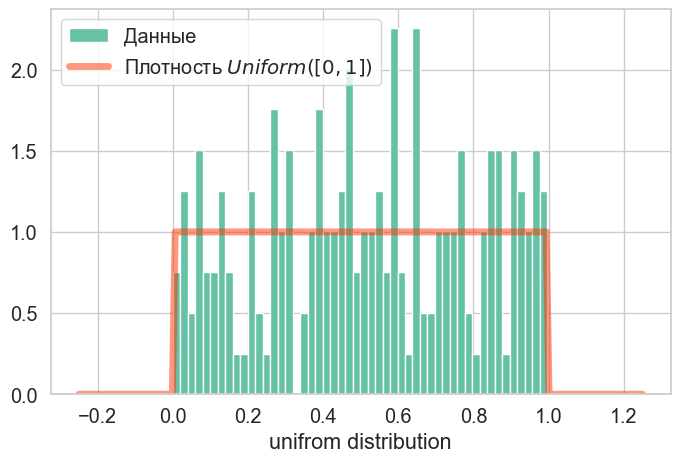

In [ ]:
count = 200
uniform_values = sps.uniform(scale=1).rvs(size=count)

grid = np.linspace(-0.25, 1.25, count)

plt.figure(figsize=(8, 5))
plt.hist(uniform_values, bins=50, density=True, label="Данные")
plt.plot(
    grid,
    sps.uniform(scale=1).pdf(grid),
    lw=5,
    alpha=0.5,
    label="Плотность $Uniform([0, 1])$",
    color="#FF3300",
)
plt.xlabel("unifrom distribution")
plt.legend()
plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision` в написанной ранее вами функции.

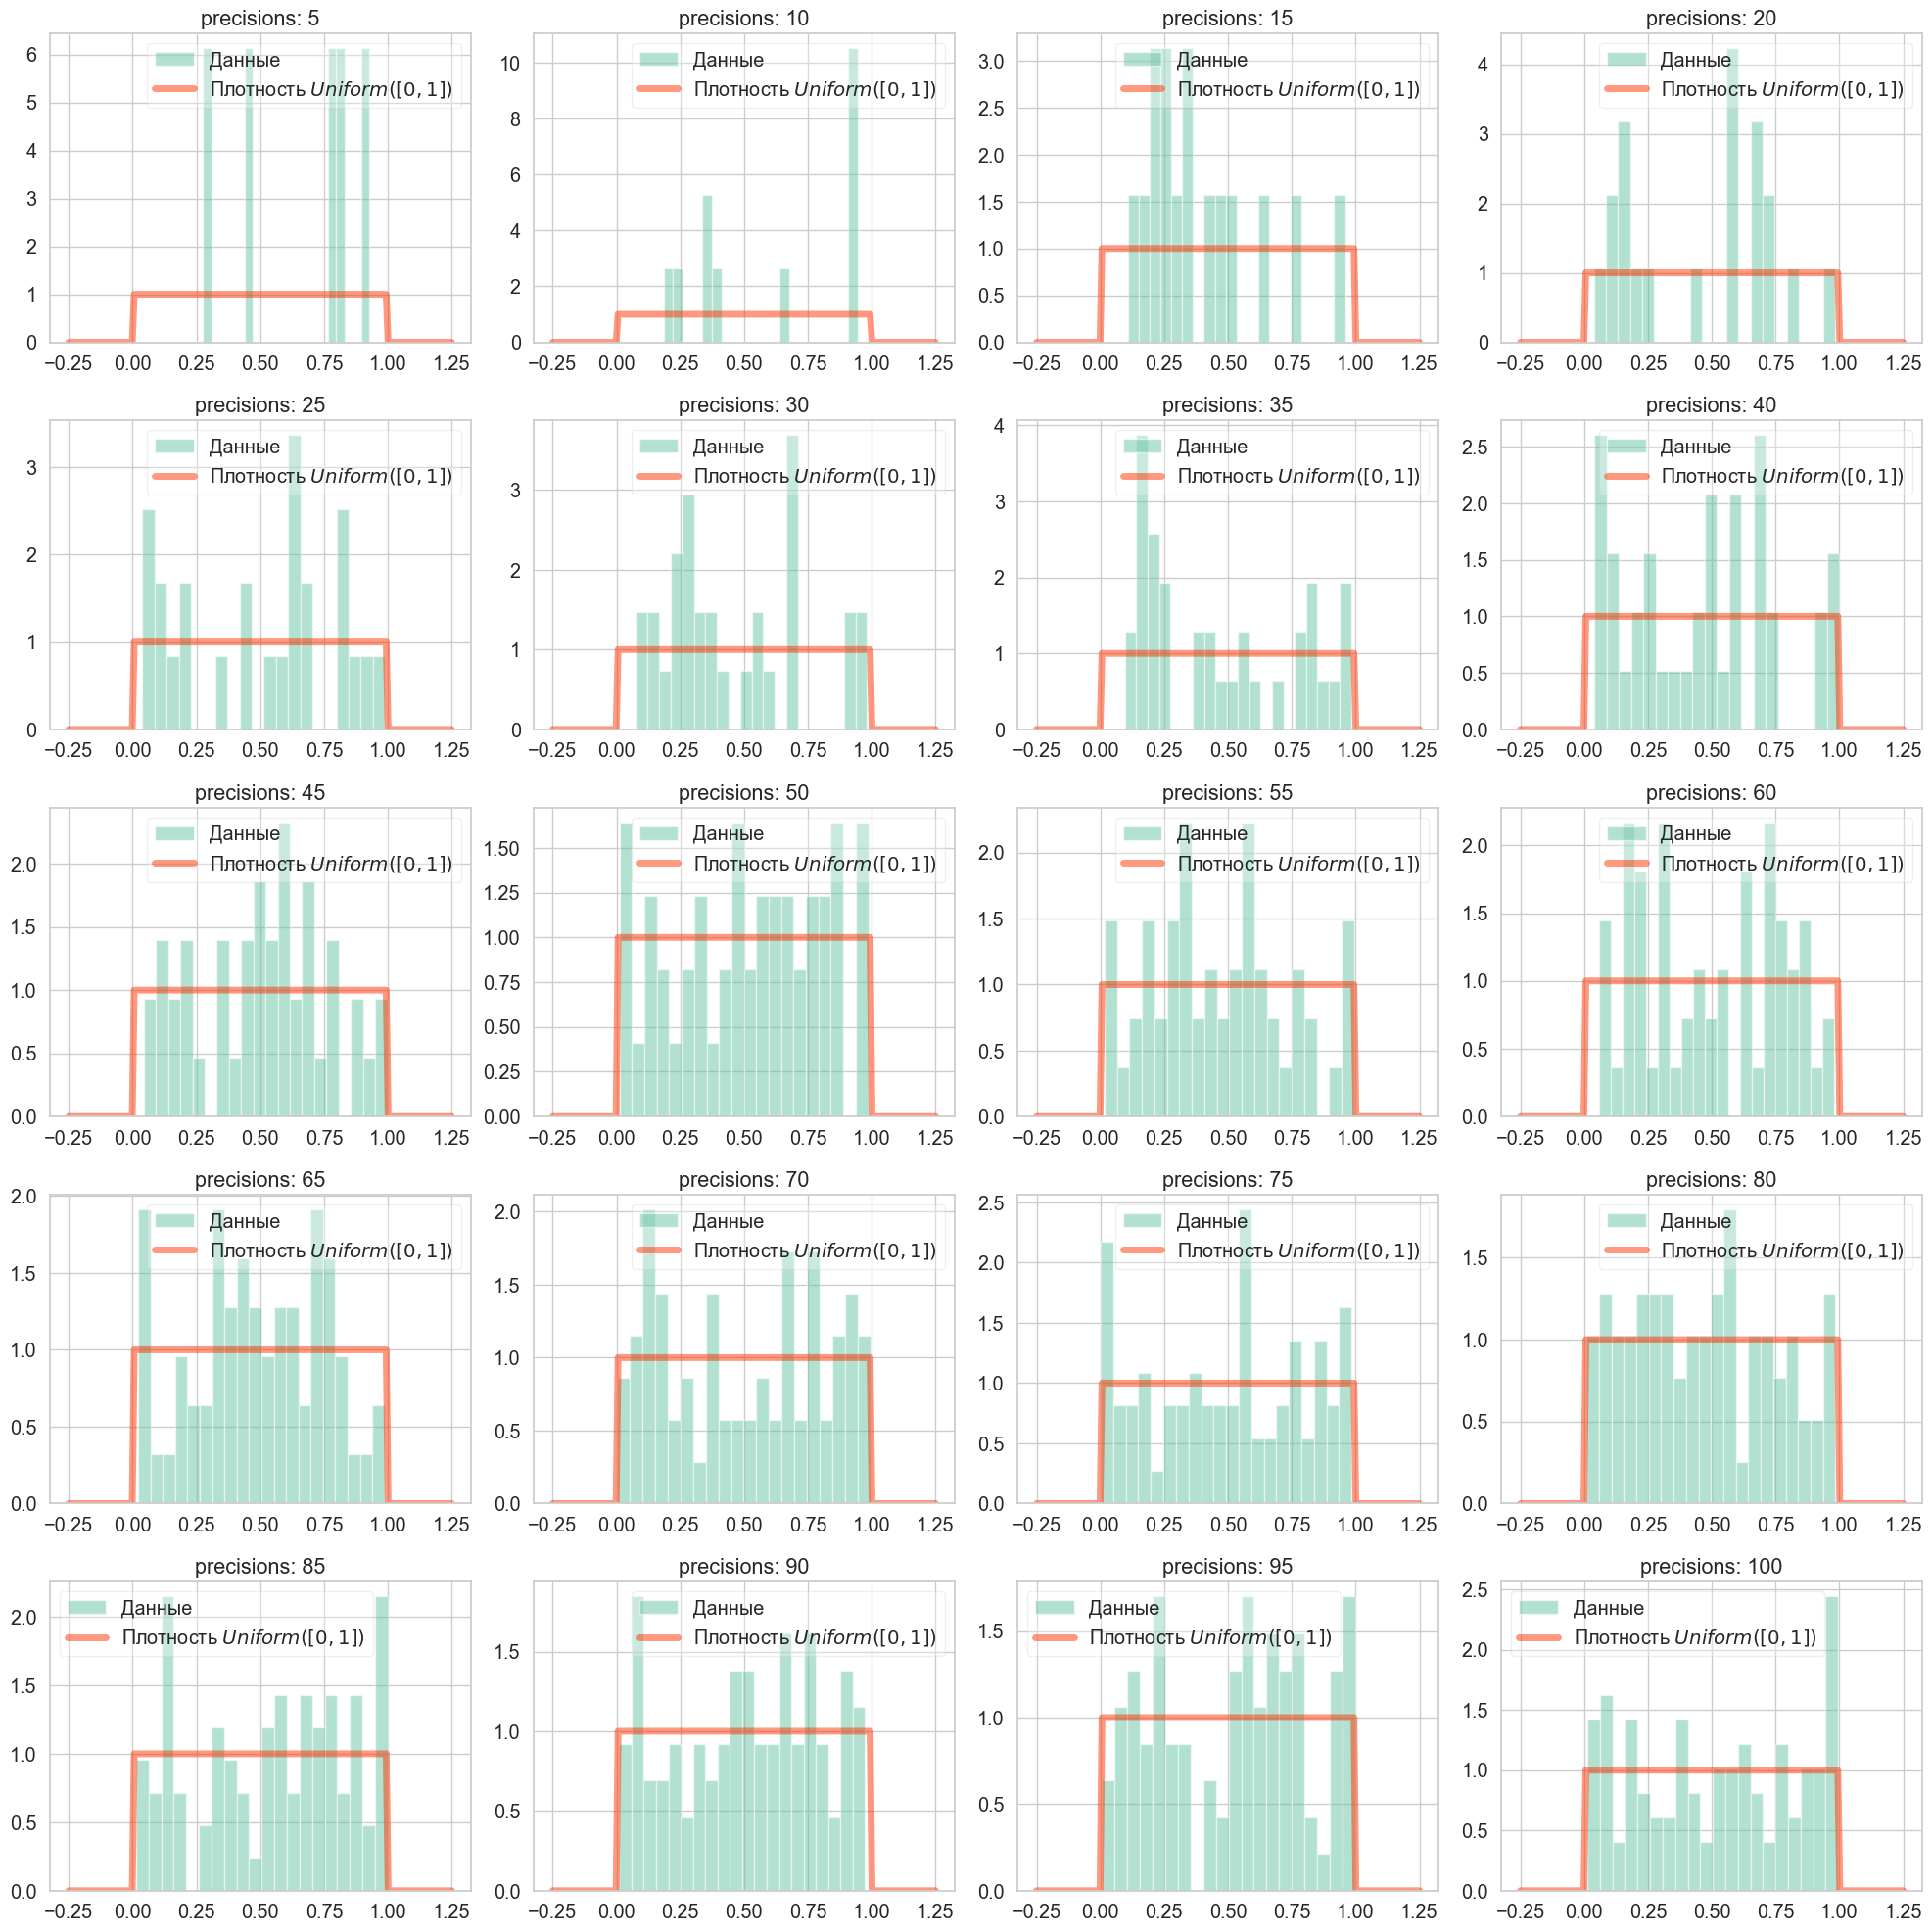

In [ ]:
smallest_prec = 5
biggest_prec = 100
count_prec = 20
precisions_value = np.linspace(smallest_prec, biggest_prec, count_prec, dtype=int)

fig, axs = plt.subplots(5, 4, figsize=(20, 20))

for i, ax in enumerate(axs.flat):
    ax.hist(uniform(int(precisions_value[i])), bins=20, density=True, alpha=0.5, label="Данные")

    ax.plot(
        grid,
        sps.uniform(scale=1).pdf(grid),
        lw=5,
        alpha=0.5,
        label="Плотность $Uniform([0, 1])$",
        color="#FF3300",
    )
    ax.set_title(f'precisions: {precisions_value[i]}')
    legend = ax.legend()

    legend.get_frame().set_alpha(0.3)


plt.tight_layout()
plt.show()

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

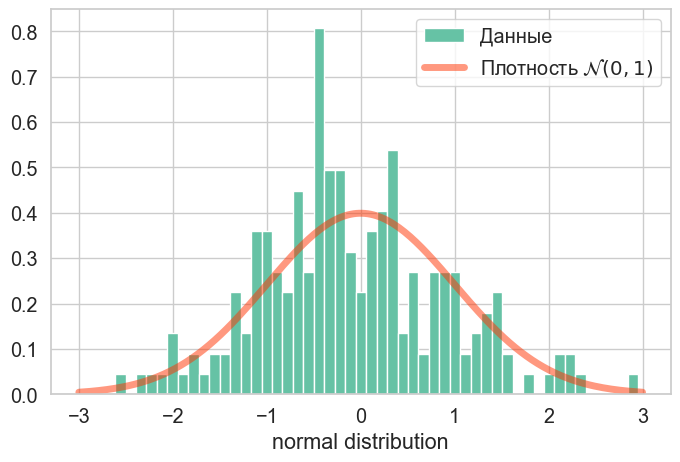

In [ ]:
count = 200
normal_values = sps.norm(0, 1).rvs(size=count)

grid = np.linspace(-3, 3, count)

plt.figure(figsize=(8, 5))
plt.hist(normal_values, bins=50, density=True, label="Данные")
plt.plot(
    grid,
    sps.norm(0, 1).pdf(grid),
    lw=5,
    alpha=0.5,
    label="Плотность $\mathcal{N}(0, 1)$",
    color="#FF3300",
)
plt.xlabel("normal distribution")
plt.legend()
plt.show()

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

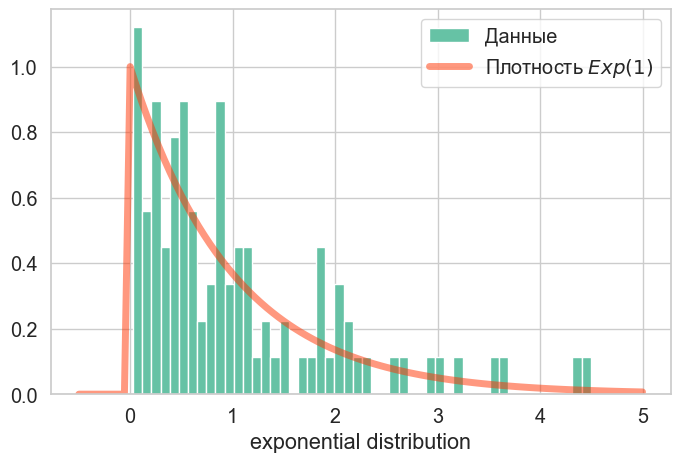

In [ ]:
count = 100
normal_values = sps.expon(0, 1).rvs(size=count)

grid = np.linspace(-0.5, 5, count)

plt.figure(figsize=(8, 5))
plt.hist(normal_values, bins=50, density=True, label="Данные")
plt.plot(
    grid,
    sps.expon(0, 1).pdf(grid),
    lw=5,
    alpha=0.5,
    label="Плотность $Exp(1)$",
    color="#FF3300",
)
plt.xlabel("exponential distribution")
plt.legend()
plt.show()

**Выводы:**

...

---

### Задача 2.

Рассмотрим <a target="_black" href="https://ru.wikipedia.org/wiki/Распределение_Коши">распределение Коши</a> с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими <a target="_black" href="https://en.wikipedia.org/wiki/Heavy-tailed_distribution">тяжелыми хвостами</a>. Иначе говоря, плотность убывает медленно при $x \to \infty$ (точное определение может различаться для разных источников). Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

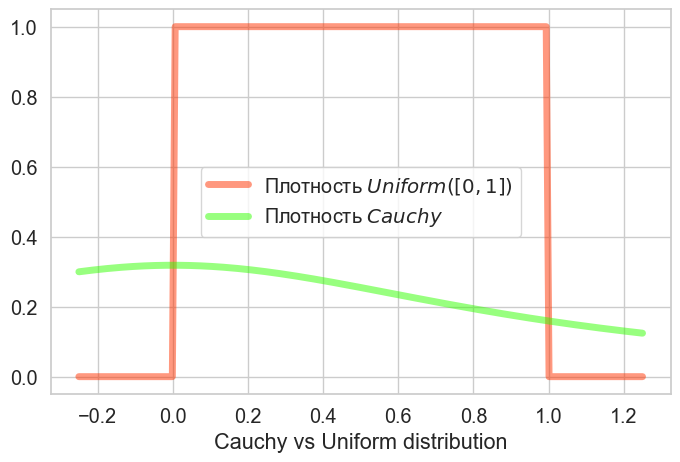

In [ ]:
count = 200
grid = np.linspace(-0.25, 1.25, count)

plt.figure(figsize=(8, 5))

plt.plot(
    grid,
    sps.uniform(scale=1).pdf(grid),
    lw=5,
    alpha=0.5,
    label="Плотность $Uniform([0, 1])$",
    color="#FF3300",
)

plt.plot(
    grid,
    sps.cauchy.pdf(grid),
    lw=5,
    alpha=0.5,
    label="Плотность $Cauchy$",
    color="#33FF00",
)

plt.xlabel("Cauchy vs Uniform distribution")
plt.legend()
plt.show()

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон?

(-100.0, 100.0)

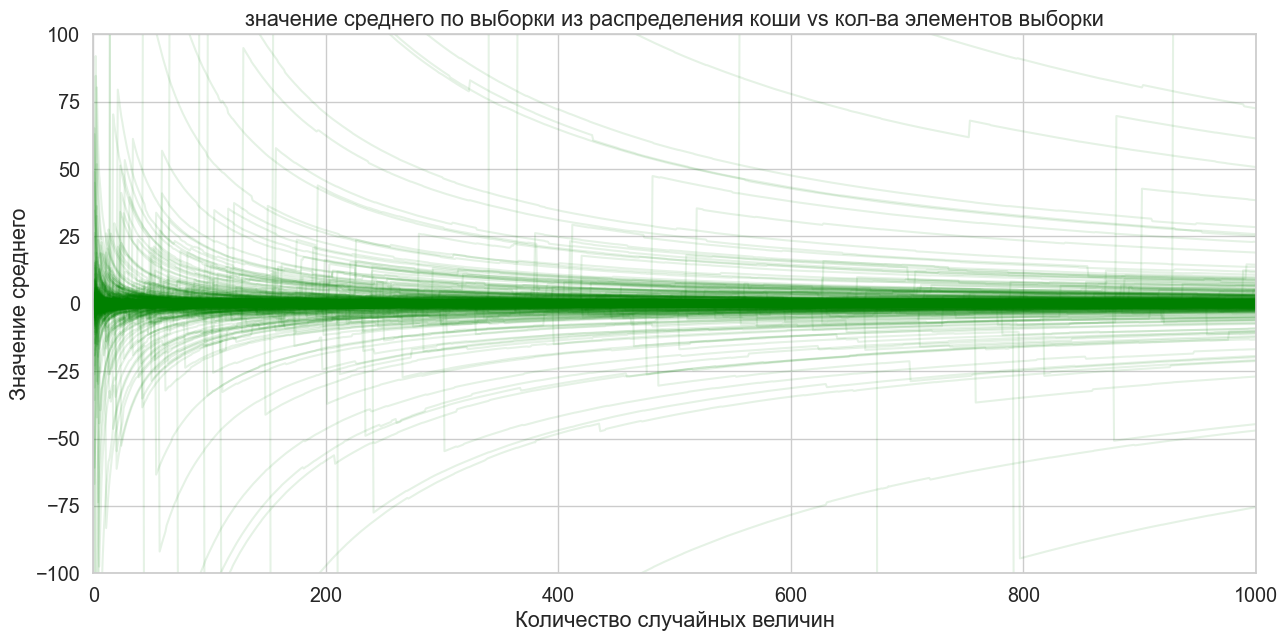

In [ ]:
plt.figure(figsize=(15, 7))
size = 1000
samples_count = 500

samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color="green", alpha=0.1)

plt.title('значение среднего по выборки из распределения Коши vs кол-ва элементов выборки')
plt.xlabel("Количество случайных величин")
plt.ylabel("Значение среднего")
plt.xlim((0, size))
plt.ylim((-100, 100))

(-5.0, 5.0)

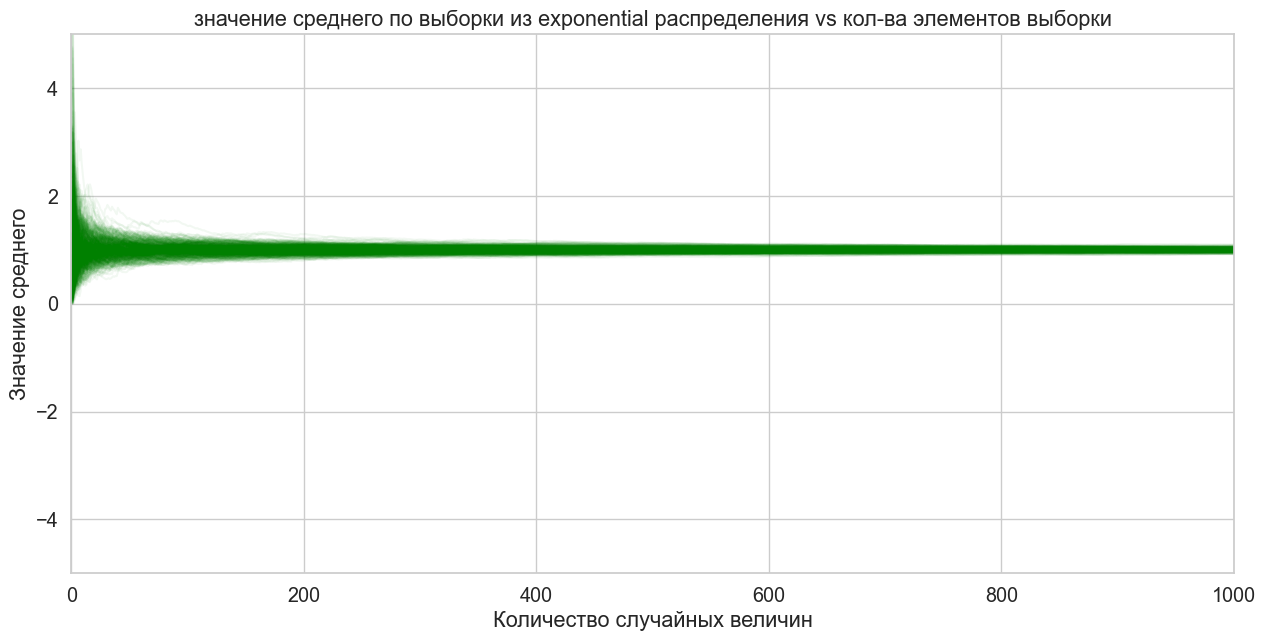

In [ ]:
plt.figure(figsize=(15, 7))
size = 1000
samples_count = 500

samples = sps.expon.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color="green", alpha=0.05)

plt.title('значение среднего по выборки из exponential распределения vs кол-ва элементов выборки')
plt.xlabel("Количество случайных величин")
plt.ylabel("Значение среднего")
plt.xlim((0, size))
plt.ylim((-5, 5))

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

(-100.0, 100.0)

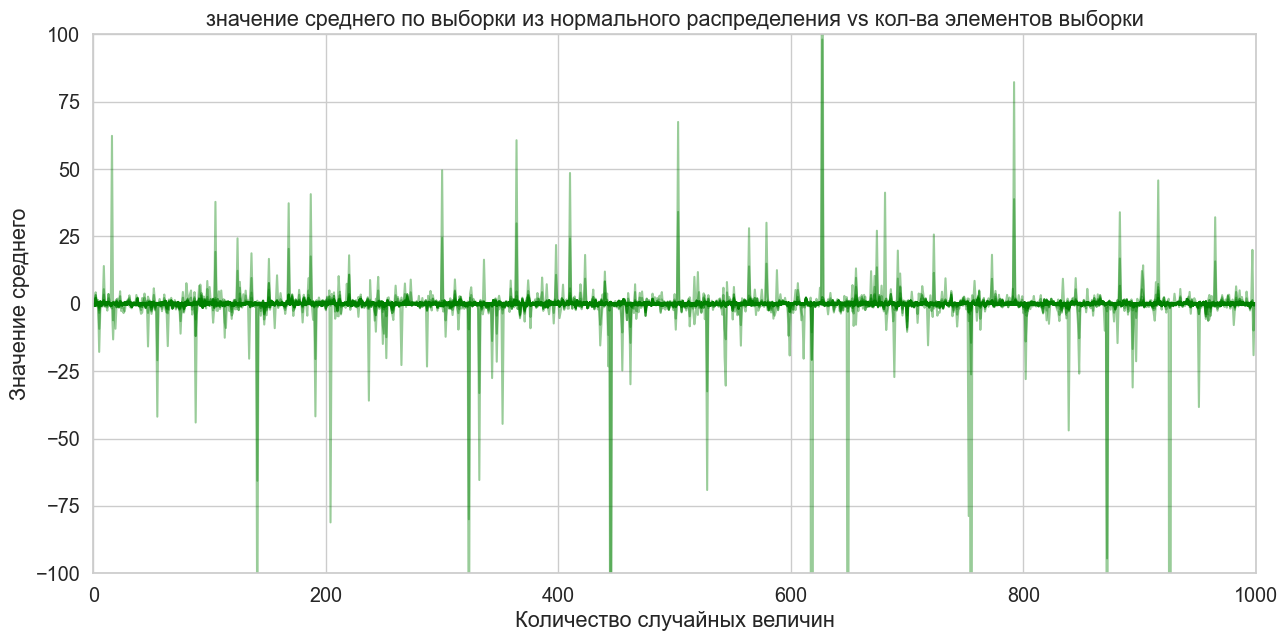

In [ ]:
plt.figure(figsize=(15, 7))
size = 1000
samples_count = 500

samples = sps.cauchy.rvs(size=(samples_count, size))
cumulative_medians = np.array([np.median(samples[:i+1], axis=0) for i in range(len(samples))])

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cumulative_medians[i], color="green", alpha=0.4)


plt.title('значение медианы по выборки из распределения Коши vs кол-ва элементов выборки')
plt.xlabel("Количество случайных величин")
plt.ylabel("Значение среднего")
plt.xlim((0, size))
plt.ylim((-100, 100))

(-100.0, 100.0)

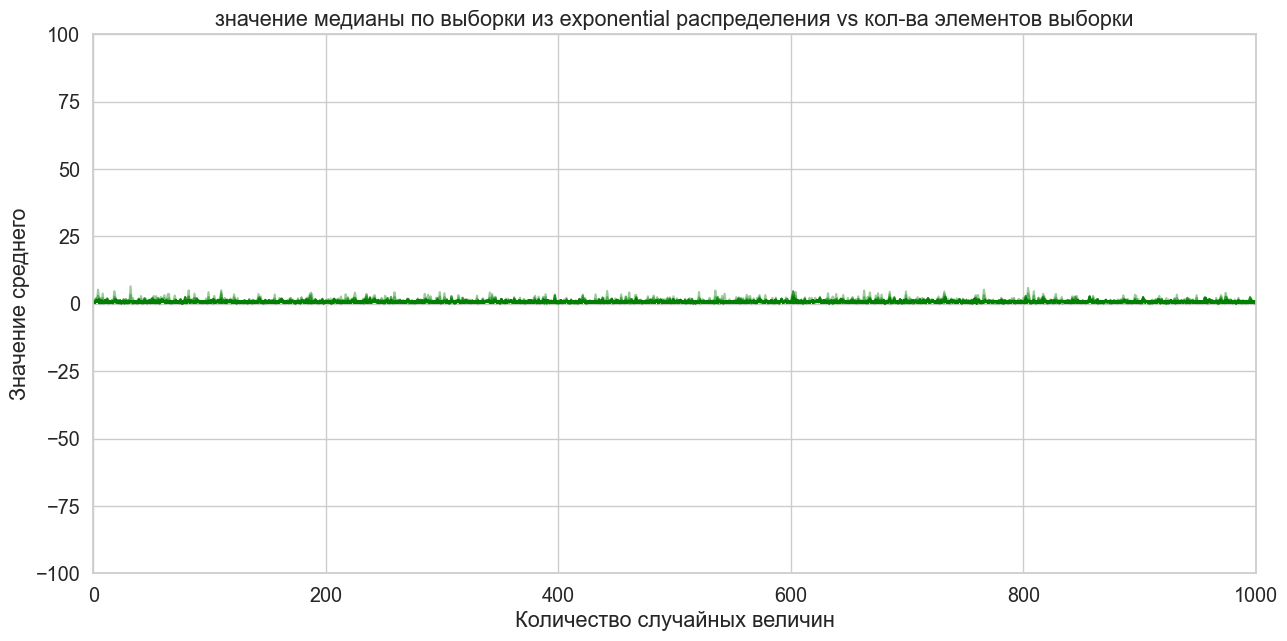

In [ ]:
plt.figure(figsize=(15, 7))
size = 1000
samples_count = 500

samples = sps.expon.rvs(size=(samples_count, size))
cumulative_medians = np.array([np.median(samples[:i+1], axis=0) for i in range(len(samples))])

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cumulative_medians[i], color="green", alpha=0.4)

plt.title('значение медианы по выборки из exponential распределения vs кол-ва элементов выборки')
plt.xlabel("Количество случайных величин")
plt.ylabel("Значение среднего")
plt.xlim((0, size))
plt.ylim((-100, 100))

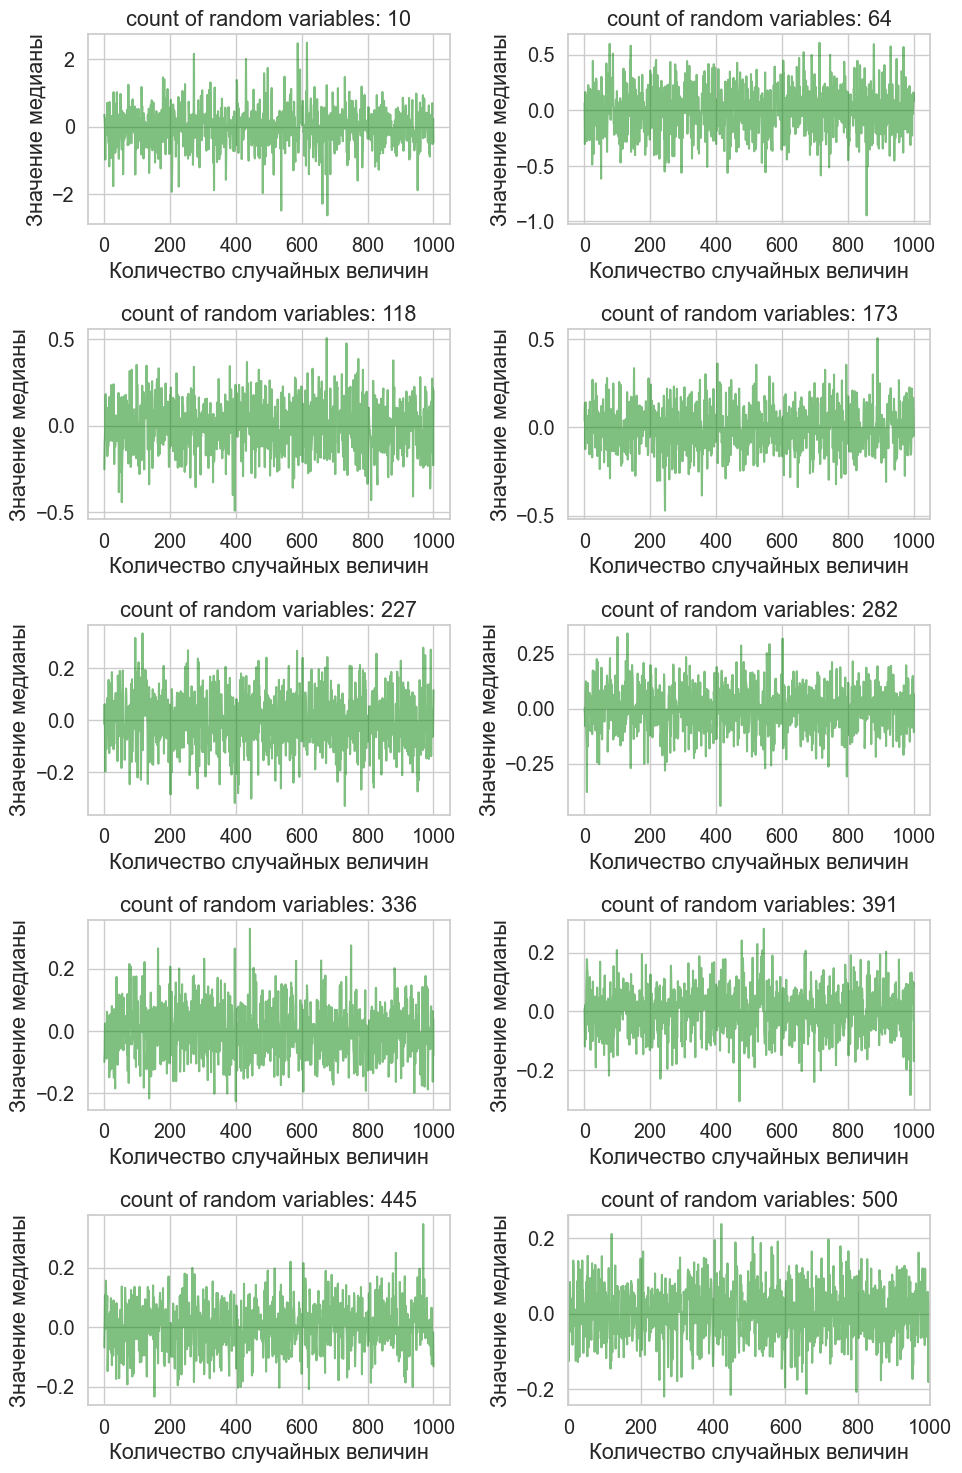

In [ ]:
size = 1000
samples_count = np.linspace(10, 500, 10, dtype=int)
fig, axs = plt.subplots(5, 2, figsize=(10, 15))

for i, ax in enumerate(axs.flat):
    sample = sps.cauchy.rvs(size=(samples_count[i], size))
    cur_median = np.median(sample, axis=0)
    ax.set_title(f'count of random variables: {samples_count[i]}')
    ax.plot(np.arange(size) + 1, cur_median, color="green", alpha=0.5)
    ax.set_xlabel('Количество случайных величин')
    ax.set_ylabel('Значение медианы')

plt.xlim((0, size))
plt.tight_layout()
plt.show()

**Вывод:**

...

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

In [ ]:
def F(n, cum_arr, a=0.5) -> float:
    return 1/cum_arr.shape[0] * np.sum(np.abs(cum_arr[:, n] - a), axis=0)

def find_min_n(target, cum_arr, a=0.5):
    n_values = np.arange(1, cum_arr.shape[1])
    idx = np.where(F(n_values, cum_arr, a) < target, n_values, cum_arr.shape[1])
    return min(idx)

minimal n = 388 with F(n) < 0.02


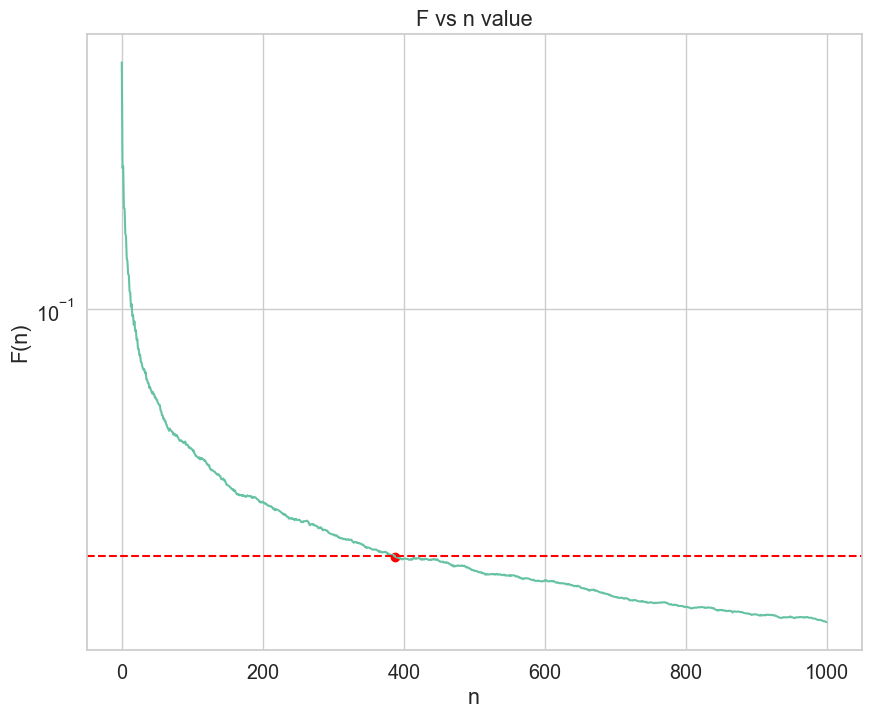

In [ ]:
K = 500
a = 0.5
deltha = 0.02
count = 1000
bern_values = sps.bernoulli(a).rvs((K, count))
cumulative_means = bern_values.cumsum(axis=1) / (np.arange(count) + 1)

min_n = find_min_n(deltha, cumulative_means, a=a)
print(f'minimal n = {min_n} with F(n) < 0.02')

plt.figure(figsize=(10, 8))
x = np.arange(0, count )
plt.plot(x, F(x, cumulative_means, a=a))

plt.title('F vs n value')
plt.xlabel('n')
plt.ylabel('F(n)')

plt.axhline(y=deltha, color='red', linestyle='--', label=f'Constant Line at y={deltha}')
plt.scatter(min_n, F(min_n, cumulative_means, a=a), color='red', label='Constant Point')
plt.yscale('log')

plt.show()

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

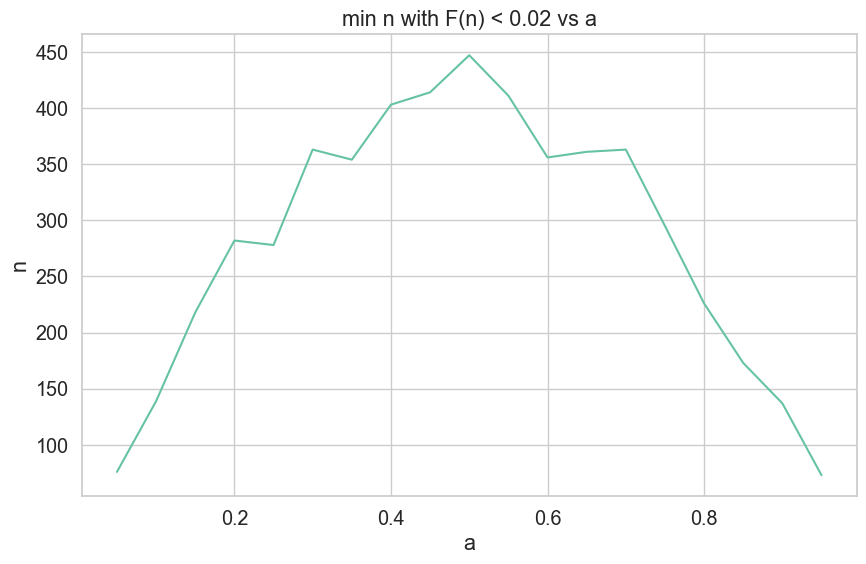

In [ ]:
min_a = 0.05
max_a = 0.95
step_a = 0.05
count = 1000
a_values = np.array(np.arange(min_a, max_a + step_a, step_a))
n_values = []

for a_val in a_values:
    cur_bern_values = sps.bernoulli(p=a_val).rvs((K, count))
    cur_cumulative_means = cur_bern_values.cumsum(axis=1) / (np.arange(count) + 1)
    cur_min_n = find_min_n(deltha, cur_cumulative_means, a=a_val)
    n_values.append(cur_min_n)

plt.figure(figsize=(10, 6))
plt.plot(a_values, n_values)

plt.title('min n with F(n) < 0.02 vs a')
plt.xlabel('a')
plt.ylabel('n')

plt.show()

**Выводы:**

...